In [1]:
#Load Required Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Loading MNIST DATA
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

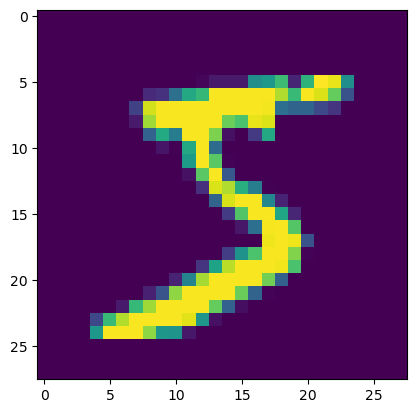

In [6]:
plt.imshow(X_train[0])

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# transforming y in one hot encoding form
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
exam=y_train[0]

In [11]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)

In [14]:
# MODEL BUILDING

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [18]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/250
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1417 - accuracy: 0.9570 - val_loss: 0.0571 - val_accuracy: 0.9823
Epoch 2/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 3/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0390 - val_accuracy: 0.9863
Epoch 4/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 5/250
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 6/250
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 7/250
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0490 -

In [54]:
loss_df=pd.DataFrame(model.history.history)

In [55]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.134995,0.959633,0.055899,0.9806
1,0.045870,0.985767,0.043222,0.9849
2,0.030102,0.990717,0.038624,0.9873
3,0.020431,0.993483,0.032882,0.9894
4,0.014025,0.995600,0.035397,0.9889
5,0.009925,0.996750,0.042566,0.9868
6,0.008384,0.997133,0.040128,0.9904
7,0.006705,0.997733,0.043938,0.9879
8,0.005264,0.998167,0.046568,0.9874
9,0.004237,0.998617,0.048168,0.9887


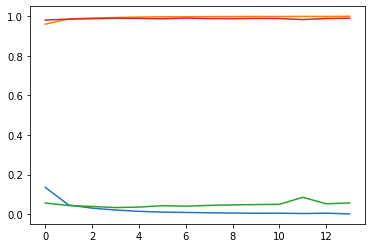

In [56]:
plt.plot(loss_df)

In [76]:
preds=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [77]:
for i in range(len(preds)):
    preds[i][np.argmax(preds[i])]=1
    preds[i]=np.round(preds[i])

In [84]:
# Test the model
confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

array([[ 970,    0,    3,    1,    0,    0,    4,    0,    2,    0],
       [   1, 1121,    1,    2,    0,    3,    3,    3,    1,    0],
       [   1,    1, 1023,    1,    0,    0,    0,    5,    1,    0],
       [   0,    0,    1, 1002,    0,    4,    0,    1,    0,    2],
       [   1,    0,    0,    0,  971,    0,    5,    0,    0,    5],
       [   1,    0,    1,    5,    0,  884,    1,    0,    0,    0],
       [   4,    1,    0,    1,    1,    3,  947,    0,    1,    0],
       [   0,    1,    6,    1,    0,    1,    0, 1014,    1,    4],
       [   2,    0,    2,    4,    1,    3,    0,    1,  958,    3],
       [   2,    1,    1,    3,    6,    3,    0,    7,    2,  984]],
      dtype=int64)

In [74]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [29]:
new_data=X_test[6]
new_data=new_data.reshape(1,28,28,1)

In [35]:
new_pred=model.predict(new_data)
print("Predicted Number :",np.argmax(new_pred))

1/1 [==============================] - 0s 17ms/step
Predicted Number : 4


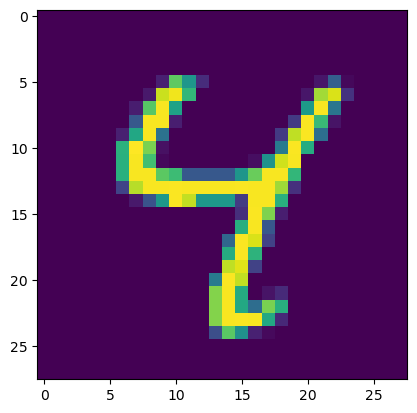

In [36]:
plt.imshow(X_test[6])

In [38]:
# Save the model

model.save('mnist.h5')

In [41]:
# Test with Loaded model
loaded_model=load_model('mnist.h5')

In [45]:
new_data=X_test[10]
new_data=new_data.reshape(1,28,28,1)
new_pred=model.predict(new_data)
print("Predicted Number :",np.argmax(new_pred))

1/1 [==============================] - 0s 17ms/step
Predicted Number : 0


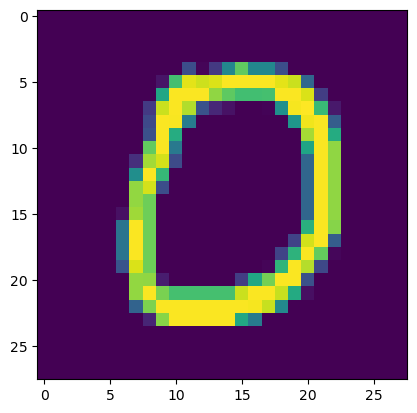

In [46]:
plt.imshow(X_test[10])